In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.simplefilter("ignore")
pd.set_option("display.max_columns", 100)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#models
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [2]:
data = pd.read_csv("USA_Housing.csv")
data2 = data.copy()

In [3]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
data.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [5]:
data.sample(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
3005,55076.072220,5.955042,6.499696,4.06,23794.951780,6.509392e+05,"541 Baldwin Orchard Apt. 917\nNeilland, IL 40407"
3049,57584.845241,6.235777,4.674074,2.12,46724.899212,9.731978e+05,"5643 Jordan Keys\nSouth Lindsayfort, KY 46709"
1022,52801.979173,5.869786,6.175533,3.18,21518.044925,6.851231e+05,"962 Brandon River Apt. 829\nSouth Jamie, GU 95398"
3581,49623.974336,6.849401,6.568940,4.13,48251.998337,1.092810e+06,Unit 9871 Box 9037\nDPO AP 37275-9289
3040,62671.730702,5.537927,6.402028,4.44,31702.714547,7.986592e+05,"21986 Smith Path Suite 568\nDeniseland, MO 01264"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [8]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [10]:
data.corr()["Price"].sort_values(ascending = False)

Price                           1.000000
Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64

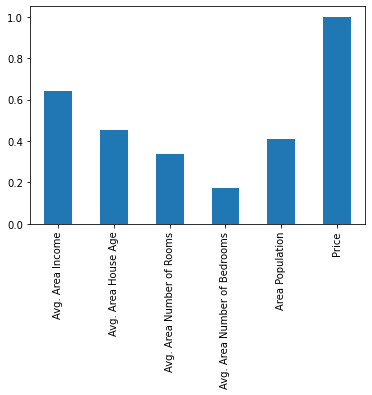

In [11]:
data.corr()["Price"].plot(kind = "bar");

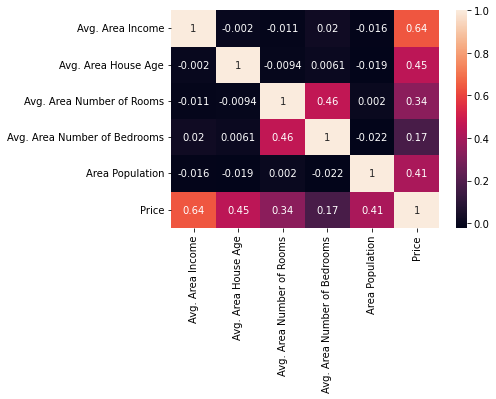

In [12]:
sbn.heatmap(data.corr(), annot = True);

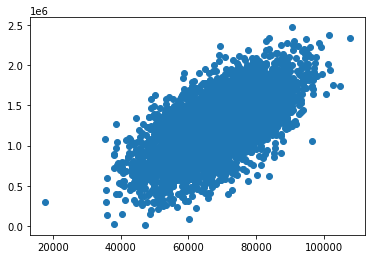

In [13]:
plt.scatter(x = data["Avg. Area Income"], y = data["Price"])

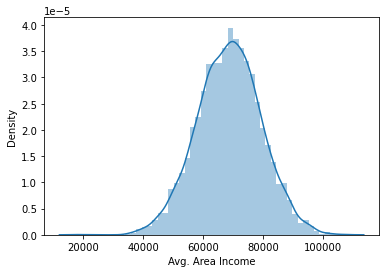

In [14]:
sbn.distplot(data["Avg. Area Income"]);

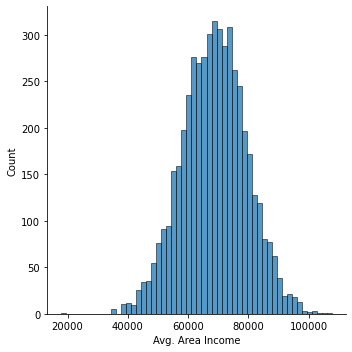

In [15]:
sbn.displot(data["Avg. Area Income"]);

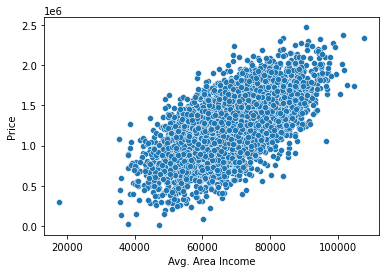

In [16]:
sbn.scatterplot(x = "Avg. Area Income", y = "Price", data = data);

In [17]:
data = data.drop("Address", axis = 1)

In [18]:
y = data["Price"]
x = data.drop("Price", axis = 1)

In [19]:
params_gb = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
params_dt = {
    'criterion' : 'squared_error',
    'random_state' : 0
}
params_sv = {
    'kernel': "linear",
    "epsilon": 0.2
}

In [20]:
def regression(x, y):
    lr = LinearRegression()
    e = ElasticNet()
    l = Lasso()
    r = Ridge()
    dt = DecisionTreeRegressor(**params_dt)
    gb = GradientBoostingRegressor(**params_gb)
    rf = RandomForestRegressor()
    kn = KNeighborsRegressor()
    sv = SVR(**params_sv)
    
    models = [lr, e, l, r, dt, gb, rf, kn, sv]
    model_names = ["Linear_Regression", "ElasticNet", "Lasso", "Ridge", "Decision_Tree", 
                   "Gradient_Boost", "Random_Forest", "KNN", "Support_Vector"]
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
    scale1 = StandardScaler()
    scale2 = MinMaxScaler()
    x_train = scale1.fit_transform(x_train)
    x_test = scale1.fit_transform(x_test)
    # x_train = scale1.fit_transform(x_train)
    # x_test = scale1.fit_transform(x_test)
    
    result_df = pd.DataFrame(columns = ["R2_Score", "RMSE"], index = model_names)
    r2 = []
    rmse = []
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r2.append(r2_score(y_true, y_pred) * 100)
        rmse.append(mean_squared_error(y_true, y_pred) ** 0.5)
        
    result_df["R2_Score"] = r2
    result_df["RMSE"] = rmse
    
    return result_df.sort_values("R2_Score", ascending = False)

In [21]:
regression(x, y)

,R2_Score,RMSE
Ridge,91.608682,101607.302574
Lasso,91.607748,101612.960101
Linear_Regression,91.607722,101613.118305
Gradient_Boost,89.368739,114367.394390
Random_Forest,87.931773,121851.694533
KNN,86.774083,127562.416648
ElasticNet,81.807486,149608.478863
Decision_Tree,74.115336,178455.981026
Support_Vector,1.466404,348178.546624


## Outlier

In [22]:
data.describe()[1:].style.background_gradient()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1232072.654142
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,353117.626581
min,17796.631190,2.644304,3.236194,2.000000,172.610686,15938.657923
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,997577.135049
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1232669.377966
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1471210.204212
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2469065.594175


In [23]:
Q1 = data["Avg. Area Income"].quantile(0.25)
Q3 = data["Avg. Area Income"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
data = data[((data["Avg. Area Income"]) > lower_limit) | ((data["Avg. Area Income"]) < upper_limit)]

In [24]:
data.sort_values("Price", ascending = False).head(20)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
465,90592.469609,7.700132,9.708803,5.19,37223.876167,2.469066e+06
2719,101599.670580,7.798746,7.480512,6.39,37523.864670,2.370231e+06
693,107701.748378,7.143522,8.518608,3.29,37619.439929,2.332111e+06
924,83814.101156,8.571797,7.392164,3.39,51538.056796,2.330290e+06
1248,94733.971275,7.885829,7.162373,5.41,46314.690046,2.318286e+06
256,91159.418327,6.536045,7.373851,3.01,54861.091097,2.298379e+06
2538,82859.591647,8.090383,6.927192,4.41,60040.547298,2.294648e+06
2300,98468.253641,7.035383,6.629233,3.05,50676.312404,2.275455e+06
901,89089.432075,7.146246,9.179994,5.29,49782.152070,2.271113e+06
622,90890.485814,7.510171,7.595487,6.21,45519.256271,2.252243e+06


In [25]:
len(data) * 0.01 

50.0

In [26]:
data = data.sort_values("Price", ascending=False).iloc[131:]

In [27]:
y1 = data["Price"]
x1 = data.drop("Price", axis = 1)
regression(x1, y1)

,R2_Score,RMSE
Linear_Regression,89.960425,106866.977349
Lasso,89.960418,106867.012837
Ridge,89.959684,106870.917228
Gradient_Boost,86.513419,123861.629087
Random_Forest,86.418400,124297.194314
KNN,84.008215,134875.893063
ElasticNet,77.614361,159577.112692
Decision_Tree,73.733050,172858.475234
Support_Vector,1.467512,334792.391599


In [28]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

Q1 = data["Avg. Area Income"].quantile(0.25)
Q3 = data["Avg. Area Income"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
data = data[(data["Avg. Area Income"] > lower_limit) | (data["Avg. Area Income"] < upper_limit)]

Q1 = data["Avg. Area House Age"].quantile(0.25)
Q3 = data["Avg. Area House Age"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
data = data[(data["Avg. Area House Age"] > lower_limit) | (data["Avg. Area House Age"] < upper_limit)]

Q1 = data["Avg. Area Number of Rooms"].quantile(0.25)
Q3 = data["Avg. Area Number of Rooms"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
data = data[(data["Avg. Area Number of Rooms"] > lower_limit) | (data["Avg. Area Number of Rooms"] < upper_limit)]

Q1 = data["Avg. Area Number of Bedrooms"].quantile(0.25)
Q3 = data["Avg. Area Number of Bedrooms"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
data = data[(data["Avg. Area Number of Bedrooms"] > lower_limit) | (data["Avg. Area Number of Bedrooms"] < upper_limit)]


Q1 = data["Area Population"].quantile(0.25)
Q3 = data["Area Population"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
data = data[(data["Area Population"] > lower_limit) | (data["Area Population"] < upper_limit)]


In [33]:
data = data.sort_values("Price", ascending = True).iloc[131:]

In [34]:
y2 = data["Price"]
x2 = data.drop("Price", axis = 1)
regression(x2, y2)

,R2_Score,RMSE
Ridge,90.293945,100323.811769
Lasso,90.293849,100324.306422
Linear_Regression,90.293849,100324.307375
Gradient_Boost,87.381475,114389.705057
Random_Forest,87.271549,114886.876849
KNN,85.746120,121576.376991
ElasticNet,76.669480,155540.989689
Decision_Tree,71.231393,172719.773294
Support_Vector,1.485044,319619.839525


In [35]:
data = data[(data["Avg. Area Income"] > 400000) | (data["Avg. Area Income"] < 1000000)]

In [36]:
y3 = data["Price"]
x3 = data.drop("Price", axis = 1)
regression(x3, y3)

,R2_Score,RMSE
Ridge,90.293945,100323.811769
Lasso,90.293849,100324.306422
Linear_Regression,90.293849,100324.307375
Gradient_Boost,87.382633,114384.456395
Random_Forest,87.190613,115251.562306
KNN,85.746120,121576.376991
ElasticNet,76.669480,155540.989689
Decision_Tree,71.231393,172719.773294
Support_Vector,1.485044,319619.839525
